## Workflow
- Build a model that can predict consumed fuel from engine speed, speed over ground, and possibly other parameters. Consumed fuel 
- should be the accumulated fuel rate over time.
- Compare the accuracy of the model for different time periods of accumulated fuel
- Analyse the sensitivity of the accumulated fuel to know how much it can deviate.
- Analyse how long time is needed for tuning the model and how it can be corrected over time.

## Typical signals

- fuel rate
- rpm
- torque
- speed over groun

## Import libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1 : With instant fuel consumption  

### EDA

In [2]:
df = pd.read_csv(r'C:\Users\Kun\Downloads\cinderella_2022_06_07_08\month_8.csv')
df.head()

C:\Users\Kun\AppData\Local\Temp\ipykernel_9516\4248699693.py:1: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\Kun\Downloads\cinderella_2022_06_07_08\month_8.csv')


,Unnamed: 0,timestamp,engineFuelRate,engineSpeed,latitude,longitude,windDirectionApparent,windDirectionTrue,windSpeedApparent,windSpeedOverGround,...,legUUID,on_route,mainRouteId,distanceToNextDock,distanceToPreviousDock,segmentId,segmentUUID,accumFuelLeg,accumDistLeg,accumTimeLeg
0,15525560,2022-08-01 00:00:00.000,0.0,0.0,59.331697,18.079136,97.6950,134.8972,3.54,3.80,...,c7832720-f928-4ba0-87a4-392c0a70e0ec,NaN,305,NaN,NaN,56869,f265fc5d-5f41-4cba-b1ca-af4baecca8e7,0.0,760.031469,11100.0
1,15525561,2022-08-01 00:00:00.300,0.0,0.0,59.331697,18.079137,104.3929,140.0939,3.24,3.18,...,c7832720-f928-4ba0-87a4-392c0a70e0ec,NaN,305,NaN,NaN,56869,f265fc5d-5f41-4cba-b1ca-af4baecca8e7,0.0,760.061336,11100.3
2,15525562,2022-08-01 00:00:00.600,0.0,0.0,59.331697,18.079137,104.3929,144.7922,3.24,3.24,...,c7832720-f928-4ba0-87a4-392c0a70e0ec,NaN,305,NaN,NaN,56869,f265fc5d-5f41-4cba-b1ca-af4baecca8e7,0.0,760.089235,11100.6
3,15525563,2022-08-01 00:00:00.900,0.0,0.0,59.331697,18.079137,104.3929,144.7922,3.24,3.24,...,c7832720-f928-4ba0-87a4-392c0a70e0ec,NaN,305,NaN,NaN,56869,f265fc5d-5f41-4cba-b1ca-af4baecca8e7,0.0,760.114853,11100.9
4,15525564,2022-08-01 00:00:01.200,0.0,0.0,59.331697,18.079137,105.9972,141.6925,3.24,3.18,...,c7832720-f928-4ba0-87a4-392c0a70e0ec,NaN,305,NaN,NaN,56869,f265fc5d-5f41-4cba-b1ca-af4baecca8e7,0.0,760.137870,11101.2


In [3]:
print(df.columns)

Index(['Unnamed: 0', 'timestamp', 'engineFuelRate', 'engineSpeed', 'latitude',
       'longitude', 'windDirectionApparent', 'windDirectionTrue',
       'windSpeedApparent', 'windSpeedOverGround', 'engineTripFuel',
       'temperature', 'magneticVariation', 'satellites', 'pitch', 'rateOfTurn',
       'roll', 'pressure', 'courseOverGroundTrue', 'headingMagnetic',
       'headingTrue', 'speedOverGround', 'deltaDistance', 'fileName',
       'deltaTimestamp', 'fuelPerStep', 'fuelPerStepEngineTrip',
       'acceleration', 'windSpeedApparentCalculated',
       'windDirectionApparentCalculated', 'courseHeadingDiff', 'engineOn',
       'steadyState', 'sailingState', 'distanceFromDock', 'closestDock',
       'segmentState', 'leg', 'legId', 'legUUID', 'on_route', 'mainRouteId',
       'distanceToNextDock', 'distanceToPreviousDock', 'segmentId',
       'segmentUUID', 'accumFuelLeg', 'accumDistLeg', 'accumTimeLeg'],
      dtype='object')


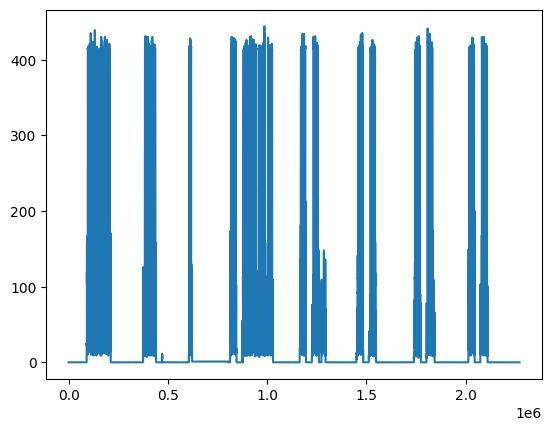

In [4]:
plt.plot(df.index, df.engineFuelRate)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2271514 entries, 0 to 2271513
Data columns (total 49 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   Unnamed: 0                       int64  
 1   timestamp                        object 
 2   engineFuelRate                   float64
 3   engineSpeed                      float64
 4   latitude                         float64
 5   longitude                        float64
 6   windDirectionApparent            float64
 7   windDirectionTrue                float64
 8   windSpeedApparent                float64
 9   windSpeedOverGround              float64
 10  engineTripFuel                   float64
 11  temperature                      float64
 12  magneticVariation                float64
 13  satellites                       float64
 14  pitch                            float64
 15  rateOfTurn                       float64
 16  roll                             float64
 17  pressure

In [6]:
df.describe()

,Unnamed: 0,engineFuelRate,engineSpeed,latitude,longitude,windDirectionApparent,windDirectionTrue,windSpeedApparent,windSpeedOverGround,engineTripFuel,...,courseHeadingDiff,distanceFromDock,legId,mainRouteId,distanceToNextDock,distanceToPreviousDock,segmentId,accumFuelLeg,accumDistLeg,accumTimeLeg
count,2.271514e+06,2.271514e+06,2.271514e+06,2.271514e+06,2.271514e+06,2.271514e+06,2.271508e+06,2.271514e+06,2.271508e+06,2.271514e+06,...,2.271514e+06,2.271514e+06,2.271514e+06,2.271514e+06,739016.000000,739016.000000,2.271514e+06,2.271514e+06,2.271514e+06,2.271514e+06
mean,1.666132e+07,6.133309e+01,4.266192e+02,5.933918e+01,1.825289e+01,1.787926e+02,1.717898e+02,3.884237e+00,2.699465e+00,1.652522e+06,...,2.797300e-02,5.070807e+02,3.707428e+03,3.237577e+02,5360.439532,3362.377064,5.934933e+04,7.309101e+01,9.675581e+03,7.878341e+07
std,6.557298e+05,1.351142e+02,7.110178e+02,3.397231e-02,2.952069e-01,1.115909e+02,8.628891e+01,4.435626e+00,2.930725e+00,1.752519e+04,...,1.818832e+00,1.240944e+03,1.357583e+02,9.465467e+00,9682.076461,3777.532174,1.365597e+03,2.740313e+02,3.518464e+04,3.524765e+08
min,1.552556e+07,0.000000e+00,0.000000e+00,5.928856e+01,1.807667e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.802310e+05,...,-3.141588e+00,1.803952e-10,3.454000e+03,3.050000e+02,0.095310,0.070134,5.686900e+04,0.000000e+00,0.000000e+00,3.000000e-01
25%,1.609344e+07,0.000000e+00,0.000000e+00,5.933159e+01,1.807919e+01,9.369580e+01,1.237933e+02,1.130000e+00,1.080000e+00,1.636439e+06,...,-1.550336e+00,6.566650e+00,3.585000e+03,3.170000e+02,204.424253,120.781192,5.811300e+04,0.000000e+00,2.180979e+02,8.469000e+02
50%,1.666132e+07,0.000000e+00,0.000000e+00,5.933162e+01,1.807937e+01,1.478919e+02,1.463964e+02,2.050000e+00,1.900000e+00,1.662116e+06,...,6.117346e-02,1.557514e+01,3.740000e+03,3.230000e+02,2585.368901,2015.651030,5.960900e+04,1.309458e+00,8.193716e+02,4.800600e+03
75%,1.722919e+07,1.900000e+01,7.760000e+02,5.933170e+01,1.835508e+01,2.816947e+02,2.418913e+02,4.160000e+00,3.290000e+00,1.664608e+06,...,1.599515e+00,1.199979e+02,3.819000e+03,3.310000e+02,6045.362482,5217.892448,6.039900e+04,5.903521e+00,2.348697e+03,1.457550e+04
max,1.779707e+07,4.440000e+02,2.012500e+03,5.948329e+01,1.893287e+01,3.598920e+02,3.598920e+02,2.361000e+01,2.844000e+01,1.667083e+06,...,3.141568e+00,7.819182e+03,3.900000e+03,3.390000e+02,47767.028026,47717.657134,6.131500e+04,1.303850e+03,1.689336e+05,1.656342e+09


- Checking for missing values

In [7]:
df.engineFuelRate.isnull().sum(), df.engineSpeed.isnull().sum(), df.speedOverGround.isnull().sum()

(0, 0, 0)

-  Futures plots

[Text(0.5, 0, 'Engine Speed'),
 Text(0, 0.5, 'Fuel Rate'),
 Text(0.5, 1.0, 'Engine Speed VS Fuel Rate')]

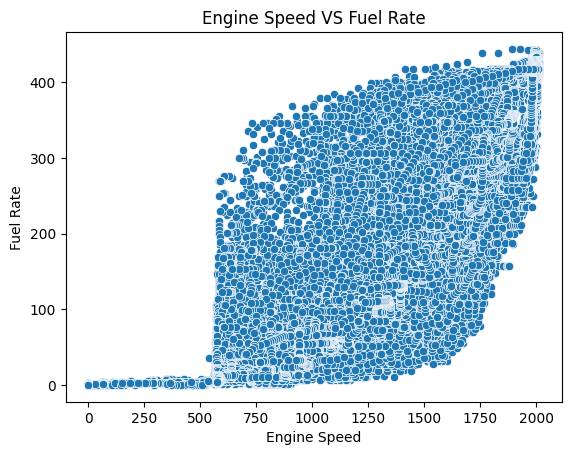

In [8]:
sns.scatterplot(data=df, x=df.engineSpeed, y=df.engineFuelRate).set(xlabel="Engine Speed", ylabel = "Fuel Rate", title= "Engine Speed VS Fuel Rate")

[Text(0.5, 0, 'Speed over ground'),
 Text(0, 0.5, 'Fuel Rate'),
 Text(0.5, 1.0, 'Speed overground VS Fuel Rate')]

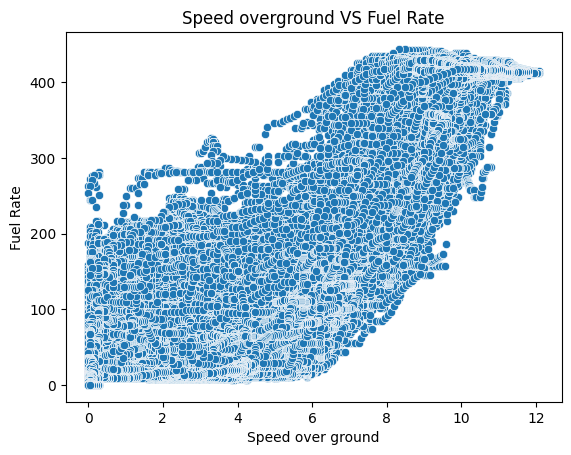

In [9]:
sns.scatterplot(data=df, x=df.speedOverGround, y=df.engineFuelRate).set(xlabel="Speed over ground", ylabel = "Fuel Rate", title= "Speed overground VS Fuel Rate")

- The engine fuel rate is close to zero when Engine Speed is lower than 550.
- Here we think of remove all the outliers before we make the model.

In [10]:
df = df.loc[df.engineSpeed > 550]
df.shape

(694737, 49)

#### Defind fuel consumption based on every 0.3 second

In [11]:
df['FuelConsumption'] = df['engineFuelRate']*0.3/3600

In [12]:
df.FuelConsumption.info()

<class 'pandas.core.series.Series'>
Int64Index: 694737 entries, 90508 to 2110434
Series name: FuelConsumption
Non-Null Count   Dtype  
--------------   -----  
694737 non-null  float64
dtypes: float64(1)
memory usage: 10.6 MB


In [13]:
X, y = df[["engineSpeed", "speedOverGround"]], df["FuelConsumption"]
X.head(5), y.head(5)

(       engineSpeed  speedOverGround
 90508        764.5             0.00
 90509        764.5             0.05
 90510        764.0             0.05
 90511        763.5             0.05
 90512        762.5             0.00,
 90508    0.000333
 90509    0.000333
 90510    0.000333
 90511    0.000333
 90512    0.000417
 Name: FuelConsumption, dtype: float64)

In [14]:
X.shape, y.shape

((694737, 2), (694737,))

## Modeling

### Data split

In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
    
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((465473, 2), (465473,), (114632, 2), (114632,), (114632, 2), (114632,))

#### Feature scaling/Feature standardization

- Normalization (min-max feature scaling)

In [16]:
scaler = MinMaxScaler()
scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train)
scaled_X_val = scaler.transform(X_val)
scaled_X_test = scaler.transform(X_test)

print(f"{scaled_X_train.min():.2f} ≤ scaled_X_train ≤ {scaled_X_train.max():.2f}")
print(f"{scaled_X_val.min():.2f} ≤ scaled_X_train ≤ {scaled_X_val.max():.2f}")
print(f"{scaled_X_test.min():.2f} ≤ scaled_X_test ≤ {scaled_X_test.max():.2f}") 

0.00 ≤ scaled_X_train ≤ 1.00
0.00 ≤ scaled_X_train ≤ 1.00
0.00 ≤ scaled_X_test ≤ 1.00


## Linear regression algorithm

In [17]:
from code import interact
from sklearn.linear_model import LinearRegression

model_SVD = LinearRegression(fit_intercept = True)
model_SVD.fit(scaled_X_train, y_train)
print(f"Parameters: {model_SVD.coef_}")
print(f"Intercept: {model_SVD.intercept_}")

model_SVD.score(scaled_X_val, y_val)

Parameters: [0.03250616 0.00639727]
Intercept: -0.005345299956086024


0.9348073003692412

### Stochastic gradient descent

In [18]:
from sklearn.linear_model import SGDRegressor

model_SGD = SGDRegressor(loss = "squared_error", learning_rate="invscaling", max_iter = 1000)
model_SGD.fit(scaled_X_train, y_train)
print(f"Parameters: {model_SGD.coef_}")
print(f"Intercept: {model_SGD.intercept_}")

model_SGD.score(scaled_X_val, y_val)

Parameters: [0.03236922 0.00652362]
Intercept: [-0.00528128]


0.9347883245010175

### Manual test


In [78]:
test_sample_features = scaled_X_test[34555].reshape(1,-1)
test_sample_target = y_test.values[34555]

print(f"Scaled features {test_sample_features}, label {test_sample_target:.7f}")
print(f"Prediction SVD: {model_SVD.predict(test_sample_features)[0]:.7f}")
print(f"Prediction SGD: {model_SGD.predict(test_sample_features)[0]:.7f}")

Scaled features [[0.9989738  0.87251656]], label 0.0348333
Prediction SVD: 0.0327092
Prediction SGD: 0.0327467


In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred_SVD = model_SVD.predict(scaled_X_test)
y_pred_SGD = model_SGD.predict(scaled_X_test)

mae_SVD = mean_absolute_error(y_test, y_pred_SVD)
mse_SVD = mean_squared_error(y_test, y_pred_SVD)
rmse_SVD = np.sqrt(mse_SVD)

mae_SGD = mean_absolute_error(y_test, y_pred_SGD)
mse_SGD = mean_squared_error(y_test, y_pred_SGD)
rmse_SGD = np.sqrt(mse_SGD)

print(f"SVD, MAE: {mae_SVD:.7f}, MSE: {mse_SVD:.7f}, RMSE: {rmse_SVD:.7f}")
print(f"SGD, MAE: {mae_SGD:.7f}, MSE: {mse_SGD:.7f}, RMSE: {rmse_SGD:.7f}")

SVD, MAE: 0.0031377, MSE: 0.0000145, RMSE: 0.0038062
SGD, MAE: 0.0031271, MSE: 0.0000145, RMSE: 0.0038065


In [21]:
pred_SVD = model_SVD.predict(scaled_X_test)
pred_SVD.shape

(114632,)

Error figure between y_test and predictors

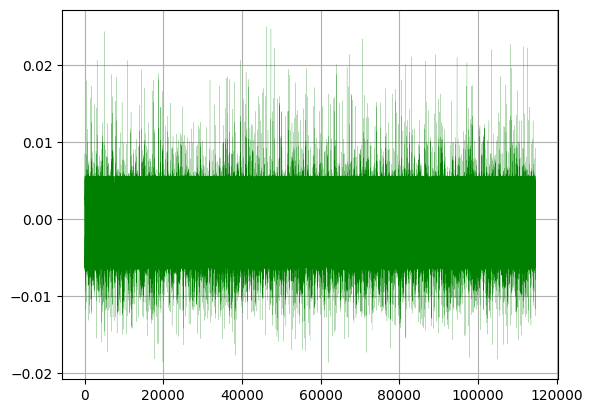

In [22]:
t = np.arange(len(scaled_X_test))
error = y_test-pred_SVD
plt.plot(t, error, 'g-', linewidth = 0.1)
plt.title = ('Compare y_test & predictors')
plt.grid()
plt.show()

## Polynomial regression

- By thinking of the interaction effects between EngineSpeed and SpeedOverGround, I try to use polynomial regression with higher degrees.

### Compare with RMSE with different degrees

In [23]:
from sklearn.preprocessing import PolynomialFeatures

MAE_val = []

for degree in range(1,10):
    model_poly = PolynomialFeatures(degree, include_bias=False)

    train_features = model_poly.fit_transform(X_train) # find out the polynomial combinations on training data
    val_features = model_poly.transform(X_val) # find out the polynomial combinations on validation data
    model_lin_reg = LinearRegression() # regression model fit 

    model_lin_reg.fit(train_features, y_train) 

    y_pred_val = model_lin_reg.predict(val_features) # use the model from train data to predict Y on validation data
    
    MAE_val.append(mean_absolute_error(y_val, y_pred_val))

[Text(0.5, 0, 'Degree'),
 Text(0, 0.5, 'MAE'),
 Text(0.5, 1.0, 'MAE on validation data for different degrees of polynomial')]

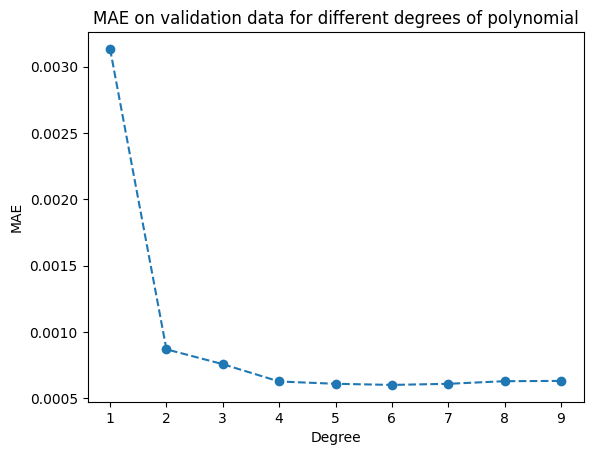

In [24]:
fig, ax = plt.figure(), plt.axes()

ax.plot(range(1,10), MAE_val[:10],'--o', label = "Validation")
ax.set(xlabel = "Degree", ylabel = "MAE", title = "MAE on validation data for different degrees of polynomial")

In [25]:
poly_model_4 = PolynomialFeatures(4, include_bias=False)
X_train_features = poly_model_4.fit_transform(scaled_X_train)
print(X_train_features.shape)

model_poly = LinearRegression()
model_poly.fit(X_train_features, y_train)

(465473, 14)


LinearRegression()

In [26]:
X_features_val_4_degree = poly_model_4.fit_transform(scaled_X_val)

model_poly.score(X_features_val_4_degree,y_val)

0.9917901673643109

In [27]:
X_features_test_4_degree = poly_model_4.fit_transform(scaled_X_test)
pred_poly_test = model_poly.predict(X_features_test_4_degree)

In [28]:
mae_Poly = mean_absolute_error(y_test, pred_poly_test)
mse_Poly = mean_squared_error(y_test, pred_poly_test)
rmse_Poly = np.sqrt(mse_SGD)

print(f"Polynormial, MAE: {mae_Poly:.7f}, MSE: {mse_Poly:.7f}, RMSE: {rmse_Poly:.7f}")

Polynormial, MAE: 0.0006231, MSE: 0.0000018, RMSE: 0.0038065


Error figure between y_test and predictors

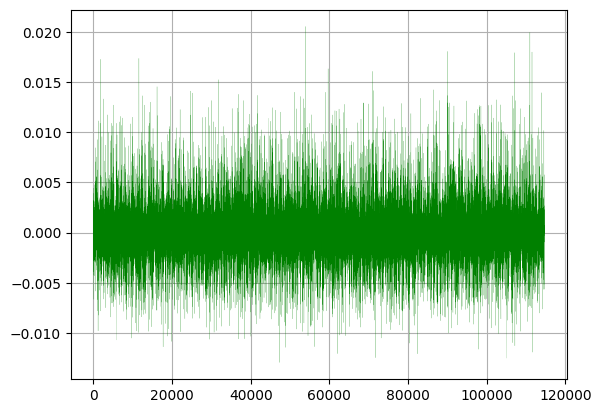

In [29]:
t = np.arange(len(scaled_X_test))
error = y_test-pred_poly_test
plt.plot(t, error, 'g-', linewidth = 0.1)
plt.title = ('Compare y_test & predictors')
plt.grid()
plt.show()

### Manual test

In [30]:
test_sample_features = scaled_X_test[67333].reshape(1,-1)
test_sample_target = y_test.values[67333]

print(f"Scaled features {test_sample_features}, label {test_sample_target:.7f}")
print(f"Prediction SVD: {model_SVD.predict(test_sample_features)[0]:.7f}")
print(f"Prediction PolyNormial: {model_poly.predict(poly_model_4.transform(test_sample_features))[0]:.7f}")

Scaled features [[0.15423822 0.03600993]], label 0.0015833
Prediction SVD: -0.0001012
Prediction PolyNormial: 0.0023471


## KNN regression model

- evaluate the KNN model with different k

In [31]:
from sklearn import neighbors

mae_val = []
for K in range(15):
    K = K+1
    model_knn = neighbors.KNeighborsRegressor(n_neighbors = K)

    model_knn.fit(scaled_X_train, y_train)  # fit the model
    pred=model_knn.predict(scaled_X_test) # make prediction on test set
    error = mean_absolute_error(y_test,pred) # calculate mae
    mae_val.append(error) # store mae values
    print('MAE value for k= ' , K , 'is:', error , 'Score(correlation) is:', model_knn.score(scaled_X_test, y_test))

MAE value for k=  1 is: 0.0005491768268449669 Score(correlation) is: 0.9891345610200849
MAE value for k=  2 is: 0.0004963783377784571 Score(correlation) is: 0.9919035354004989
MAE value for k=  3 is: 0.00047453899525912695 Score(correlation) is: 0.9928391011667271
MAE value for k=  4 is: 0.00046294229560897327 Score(correlation) is: 0.9932806103290643
MAE value for k=  5 is: 0.0004537185550365263 Score(correlation) is: 0.9935681545565639
MAE value for k=  6 is: 0.0004492358755618512 Score(correlation) is: 0.9937228899156252
MAE value for k=  7 is: 0.00044516983947266763 Score(correlation) is: 0.9938393770297772
MAE value for k=  8 is: 0.0004420364952746952 Score(correlation) is: 0.9939382937482169
MAE value for k=  9 is: 0.0004402388347904138 Score(correlation) is: 0.9940023342051992
MAE value for k=  10 is: 0.00043899607298204964 Score(correlation) is: 0.9940465096412587
MAE value for k=  11 is: 0.0004379409335069655 Score(correlation) is: 0.9940886778195894
MAE value for k=  12 is: 0

<AxesSubplot:title={'center':'MAE vs k-values'}>

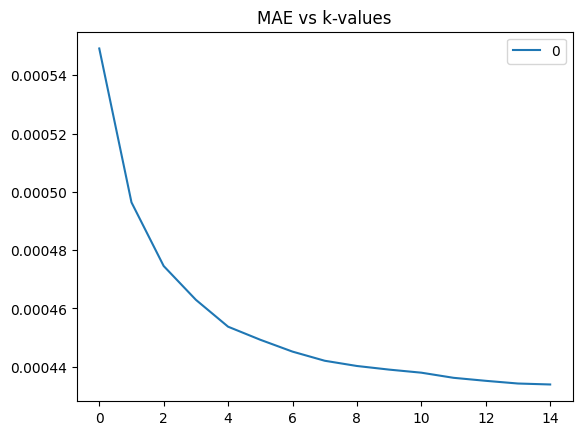

In [32]:
curve = pd.DataFrame(mae_val) 
curve.plot(title = "MAE vs k-values")

In [33]:
from sklearn import neighbors

knn_reg = neighbors.KNeighborsRegressor(n_neighbors=7, weights='uniform') # the defalt value of k is 5
knn_reg.fit(scaled_X_train, y_train)
knn_reg.score(scaled_X_val, y_val)

0.9937615121693859

In [34]:
pred_knn_test = knn_reg.predict(scaled_X_test)

In [35]:
mae_knn = mean_absolute_error(y_test, pred_knn_test)
mse_knn = mean_squared_error(y_test, pred_knn_test)
rmse_knn = np.sqrt(mse_knn)

print(f"Polynormial, MAE: {mae_knn:.7f}, MSE: {mse_knn:.7f}, RMSE: {rmse_knn:.7f}")

Polynormial, MAE: 0.0004452, MSE: 0.0000014, RMSE: 0.0011688


In [37]:
test_sample_features = scaled_X_test[12345].reshape(1,-1)
test_sample_target = y_test.values[12345]

print(f"Scaled features {test_sample_features}, label {test_sample_target:.7f}")
print(f"Prediction SVD: {model_SVD.predict(test_sample_features)[0]:.7f}")
print(f"Prediction PolyNormial: {model_poly.predict(poly_model_4.transform(test_sample_features))[0]:.7f}")
print(f"Prediction KNN: {knn_reg.predict(test_sample_features)[0]:.7f}")

Scaled features [[0.99760553 0.8468543 ]], label 0.0347500
Prediction SVD: 0.0325006
Prediction PolyNormial: 0.0345603
Prediction KNN: 0.0346548


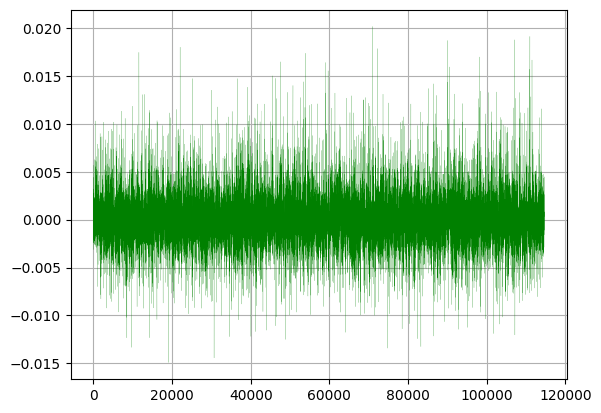

In [38]:
t = np.arange(len(scaled_X_test))
error = y_test-pred_knn_test
plt.plot(t, error, 'g-', linewidth = 0.1)
plt.title = ('Compare y_test & predictors')
plt.grid()
plt.show()

#### Choosing the right value for K

- As decreasing the value of K to 1, the predictions become less stable. (overfitting)
- As we increase the value of K, our predictions become more stable due to majority voting / averaging. However, we begin to witness an increasing number of errors. (underfitting) The model will be more likely to close to Linear regression.
- we usually make K an odd number to have a tiebreaker.

#### Advantages & disadvantages for KNN

- The algorithm is simple and easy to implement.
- There’s no need to build a model, tune several parameters, or make additional assumptions.
- It can used for both classification and regression.

- The algorithm gets significantly slower as the number of data size and features increase. (Not suggest for more than 3 features. The prediction will be not stable because the curse of dimensionality)

## Decision Tree Regression

In [39]:
from sklearn.tree import DecisionTreeRegressor

In [40]:
mae_val_tree = []

for d in range(20):
    d = d+1
    
    model_tree_regression = DecisionTreeRegressor(max_depth = d) 
    model_tree_regression.fit(X_train, y_train)  # fit the model
    pred = model_tree_regression.predict(X_test) # make prediction on test set
    error = mean_absolute_error(y_test,pred) # calculate mae
    mae_val_tree.append(error) # store mae values
    print('MAE value for max_depth= ' , d , 'is:', error , 'Score is:', model_tree_regression.score(X_test, y_test))

MAE value for max_depth=  1 is: 0.002416969293416517 Score is: 0.9415102201090503
MAE value for max_depth=  2 is: 0.0011254155310206208 Score is: 0.9790336226264031
MAE value for max_depth=  3 is: 0.0008133045543939238 Score is: 0.9866238262224704
MAE value for max_depth=  4 is: 0.0007134583681619303 Score is: 0.9904943144520336
MAE value for max_depth=  5 is: 0.0005940494339649998 Score is: 0.992343786539544
MAE value for max_depth=  6 is: 0.0005360198984894045 Score is: 0.993075010381544
MAE value for max_depth=  7 is: 0.0004885053504504811 Score is: 0.993415678452103
MAE value for max_depth=  8 is: 0.0004782286947664447 Score is: 0.9936035853391512
MAE value for max_depth=  9 is: 0.0004633957696598669 Score is: 0.9937358422018874
MAE value for max_depth=  10 is: 0.00045501176226058084 Score is: 0.9937678007030215
MAE value for max_depth=  11 is: 0.00044743845286534075 Score is: 0.9937238030408823
MAE value for max_depth=  12 is: 0.0004440021006313752 Score is: 0.9935423595287066
MAE

<AxesSubplot:title={'center':'MAE vs max_depth'}>

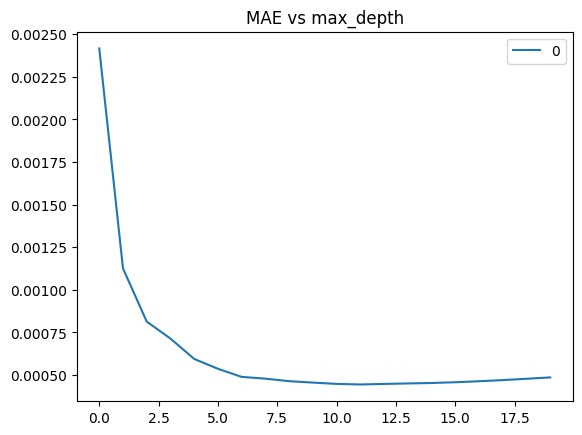

In [41]:
curve = pd.DataFrame(mae_val_tree) 
curve.plot(title = "MAE vs max_depth")

In [42]:
model_tree_regression = DecisionTreeRegressor(max_depth = 7) 

In [43]:
model_tree_regression.fit(X_train, y_train) 
# Decision trees methods do not require feature scaling to be performed as they are not sensitive to the the variance in the data.

model_tree_regression.feature_importances_
# scikit-learn决策树类中的feature_importances_属性返回的是特征的重要性，feature_importances_越高代表特征越重要。

array([0.04972609, 0.95027391])

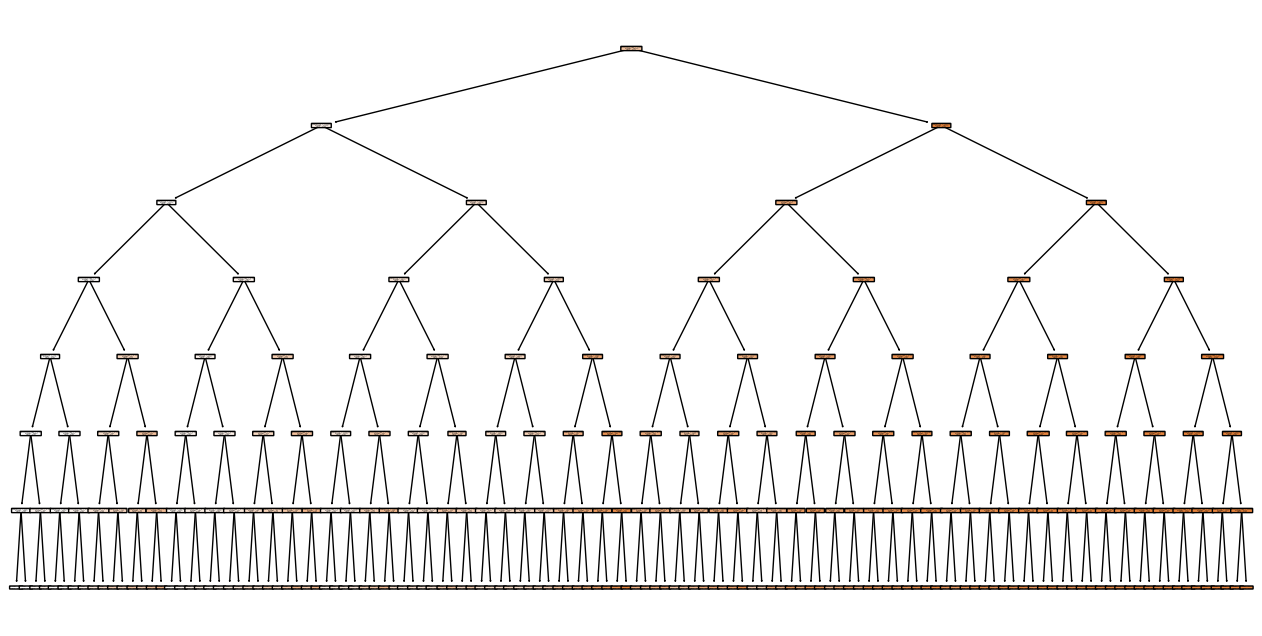

In [44]:
from sklearn import tree

fig, ax = plt.figure(figsize=(16,8), dpi=100), plt.axes()
tree.plot_tree(model_tree_regression, filled=True, ax=ax, feature_names=list(X.columns), impurity=False, rounded=True);

In [45]:
# print(tree.export_text(model_tree_regression, feature_names = list(X_train.columns)))

In [46]:
y_tree_pred = model_tree_regression.predict(X_test)

mae_tree = mean_absolute_error(y_test, y_tree_pred)
mse_tree = mean_squared_error(y_test, y_tree_pred)
rmse_tree = np.sqrt(mse_tree)

print(f"Decision tree, MAE: {mae_tree:.7f}, MSE: {mse_tree:.7f}, RMSE: {rmse_tree:.7f}")

Decision tree, MAE: 0.0004885, MSE: 0.0000015, RMSE: 0.0012084


In [47]:
model_tree_regression.score(X_val, y_val)

0.9933449372217774

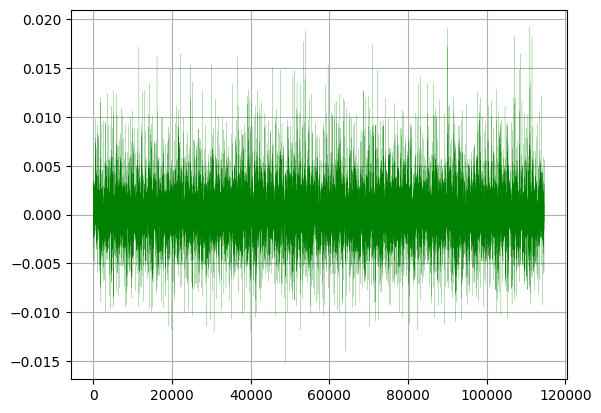

In [48]:
t = np.arange(len(scaled_X_test))
error = y_test-y_tree_pred
plt.plot(t, error, 'g-', linewidth = 0.1)
plt.title = ('Compare y_test & predictors')
plt.grid()
plt.show()

In [50]:
X_test_tree = np.array(X_test)[13579].reshape(1,-1)
test_sample_features = scaled_X_test[13579].reshape(1,-1)
test_sample_target = y_test.values[13579]

print(f"Scaled features {test_sample_features}, label {test_sample_target:.7f}")

print(f"Prediction SVD: {model_SVD.predict(test_sample_features)[0]:.7f}")
print(f"Prediction PolyNormial: {model_poly.predict(poly_model_4.transform(test_sample_features))[0]:.7f}")
print(f"Prediction KNN: {knn_reg.predict(test_sample_features)[0]:.7f}")
print(f"Prediction Decision tree: {model_tree_regression.predict(X_test_tree)[0]:.7f}")

Scaled features [[0.09215297 0.        ]], label 0.0009167
Prediction SVD: -0.0023498
Prediction PolyNormial: 0.0009687
Prediction KNN: 0.0010000
Prediction Decision tree: 0.0011917


c:\Users\Kun\.virtualenvs\Deep_learning-JeCDGH9C\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


## Random forest

In [51]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [52]:
rfr.fit(scaled_X_train, y_train)

score = rfr.score(scaled_X_train, y_train)
print("R-squared:", score) 

R-squared: 0.9984698148535455


In [53]:
ypred_rfr = rfr.predict(scaled_X_test)

mae_rfr = mean_absolute_error(y_test, ypred_rfr)
mse_rfr = mean_squared_error(y_test, ypred_rfr)
rmse_rfr = np.sqrt(mse_rfr)

print(f"Random forest, MAE: {mae_rfr:.7f}, MSE: {mse_rfr:.7f}, RMSE: {rmse_rfr:.7f}")

Random forest, MAE: 0.0004527, MSE: 0.0000015, RMSE: 0.0012172


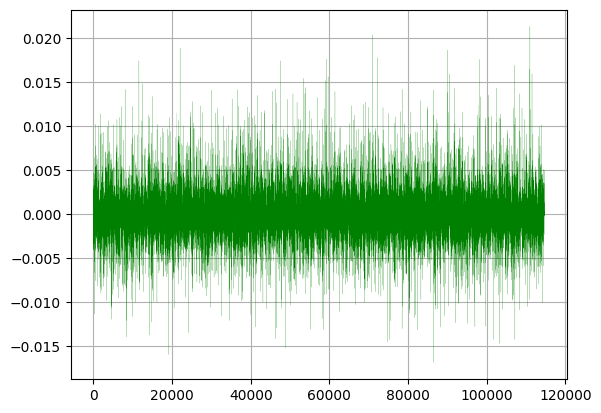

In [54]:
t = np.arange(len(scaled_X_test))
error = y_test-ypred_rfr
plt.plot(t, error, 'g-', linewidth = 0.1)
plt.title = ('Compare y_test & predictors')
plt.grid()
plt.show()

In [56]:
X_test_tree = np.array(X_test)[23456].reshape(1,-1)
test_sample_features = scaled_X_test[23456].reshape(1,-1)
test_sample_target = y_test.values[23456]

print(f"Scaled features {test_sample_features}, label {test_sample_target:.7f}")

print(f"Prediction SVD: {model_SVD.predict(test_sample_features)[0]:.7f}")
print(f"Prediction PolyNormial: {model_poly.predict(poly_model_4.transform(test_sample_features))[0]:.7f}")
print(f"Prediction KNN: {knn_reg.predict(test_sample_features)[0]:.7f}")
print(f"Prediction Decision tree: {model_tree_regression.predict(X_test_tree)[0]:.7f}")
print(f"Prediction rfr: {rfr.predict(test_sample_features)[0]:.7f}")

Scaled features [[0.48014298 0.51490066]], label 0.0074167
Prediction SVD: 0.0135563
Prediction PolyNormial: 0.0079553
Prediction KNN: 0.0074643
Prediction Decision tree: 0.0076693
Prediction rfr: 0.0076702


c:\Users\Kun\.virtualenvs\Deep_learning-JeCDGH9C\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


- The test of Random forest got a best score of coefficient, however, the running time was much slower than other algorithms.

|      Models      |       MAE      |     Score (corralation coefficient)    |
|-----------------|-----------------|---------------|
|     Linear Regression     |       0.0031       |       0.934807       |
|         SGD        |        0.0031        |     0.934788    | 
|           Polynormial Regression      |         0.00062     |   0.991790 |
|             KNN (k = 7)   |         0.0004      |       0.993762        | 
|             Decision (max_depth = 7)   |         0.0005      |      0.993345   | 
|             Random Forest (default)   |         0.00045     |      0.998470    | 


## Errors and Accuracy of the model for different time periods

- Create columns which contain the predictors from different algorithms

In [57]:
scaled_X = scaler.transform(X)

In [58]:
df['FuelPred_SVD'] = model_SVD.predict(scaled_X)
df['FuelPred_SVD'].describe()

count    694737.000000
mean          0.016691
std           0.014385
min          -0.005345
25%           0.002997
50%           0.015344
75%           0.032649
max           0.033491
Name: FuelPred_SVD, dtype: float64

In [59]:
X_features = poly_model_4.fit_transform(scaled_X)
df['FuelPred_Poly'] = model_poly.predict(X_features)

In [60]:
df['FuelPred_Poly'].describe()

count    694737.000000
mean          0.016690
std           0.014817
min           0.000489
25%           0.002254
50%           0.009411
75%           0.034519
max           0.041384
Name: FuelPred_Poly, dtype: float64

In [61]:
df['FuelPred_knn'] = knn_reg.predict(scaled_X)

In [62]:
df['FuelPred_Poly'].describe()

count    694737.000000
mean          0.016690
std           0.014817
min           0.000489
25%           0.002254
50%           0.009411
75%           0.034519
max           0.041384
Name: FuelPred_Poly, dtype: float64

In [63]:
df['FuelPred_tree'] = model_tree_regression.predict(X)

In [64]:
df['FuelPred_tree'].describe()

count    694737.000000
mean          0.016689
std           0.014829
min           0.000756
25%           0.002160
50%           0.009396
75%           0.034515
max           0.034828
Name: FuelPred_tree, dtype: float64

In [65]:
df['FuelPred_rfr'] = rfr.predict(scaled_X)

In [66]:
df['FuelPred_rfr'].describe()

count    694737.000000
mean          0.016691
std           0.014850
min           0.000153
25%           0.002127
50%           0.009346
75%           0.034505
max           0.036276
Name: FuelPred_rfr, dtype: float64

In [67]:
df.columns

Index(['Unnamed: 0', 'timestamp', 'engineFuelRate', 'engineSpeed', 'latitude',
       'longitude', 'windDirectionApparent', 'windDirectionTrue',
       'windSpeedApparent', 'windSpeedOverGround', 'engineTripFuel',
       'temperature', 'magneticVariation', 'satellites', 'pitch', 'rateOfTurn',
       'roll', 'pressure', 'courseOverGroundTrue', 'headingMagnetic',
       'headingTrue', 'speedOverGround', 'deltaDistance', 'fileName',
       'deltaTimestamp', 'fuelPerStep', 'fuelPerStepEngineTrip',
       'acceleration', 'windSpeedApparentCalculated',
       'windDirectionApparentCalculated', 'courseHeadingDiff', 'engineOn',
       'steadyState', 'sailingState', 'distanceFromDock', 'closestDock',
       'segmentState', 'leg', 'legId', 'legUUID', 'on_route', 'mainRouteId',
       'distanceToNextDock', 'distanceToPreviousDock', 'segmentId',
       'segmentUUID', 'accumFuelLeg', 'accumDistLeg', 'accumTimeLeg',
       'FuelConsumption', 'FuelPred_SVD', 'FuelPred_Poly', 'FuelPred_knn',
       'F

In [68]:
df_new = df[["timestamp", "FuelConsumption", "FuelPred_SVD", "FuelPred_Poly", "FuelPred_knn", "FuelPred_tree", "FuelPred_rfr"]]

In [69]:
df_new['timestamp'] = pd.to_datetime(df_new['timestamp'])
df_new['timestamp'].head()

C:\Users\Kun\AppData\Local\Temp\ipykernel_9516\2253390898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['timestamp'] = pd.to_datetime(df_new['timestamp'])


90508   2022-08-01 07:55:49.800
90509   2022-08-01 07:55:50.100
90510   2022-08-01 07:55:50.400
90511   2022-08-01 07:55:50.700
90512   2022-08-01 07:55:51.000
Name: timestamp, dtype: datetime64[ns]

### Total fuel consumptions & predictors with different algorithms calculate by days

In [70]:
df_days = df_new.groupby(pd.Grouper(key = 'timestamp', freq = 'D')).sum().reset_index()
df_days.head()

,timestamp,FuelConsumption,FuelPred_SVD,FuelPred_Poly,FuelPred_knn,FuelPred_tree,FuelPred_rfr
0,2022-08-01,2306.730167,2365.888329,2302.407491,2309.106284,2307.416461,2309.833718
1,2022-08-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2022-08-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2022-08-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2022-08-05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [71]:
mae_SVD_days = mean_absolute_error(df_days.FuelConsumption, df_days.FuelPred_SVD)
mae_Poly_days = mean_absolute_error(df_days.FuelConsumption, df_days.FuelPred_Poly)
mae_knn_days = mean_absolute_error(df_days.FuelConsumption, df_days.FuelPred_knn)
mae_tree_days = mean_absolute_error(df_days.FuelConsumption, df_days.FuelPred_tree)
mae_rfr_days = mean_absolute_error(df_days.FuelConsumption, df_days.FuelPred_rfr)

print(f"Absolute Error (days) is {mae_SVD_days:.2f} for model SVD") 
print(f"{mae_Poly_days:.2f} for model Polynormial") 
print(f"{mae_knn_days:.2f} for model KNN")
print(f"{mae_tree_days:.2f} for decision trees") 
print(f"{mae_rfr_days:.2f} for random forest")

Absolute Error (days) is 17.25 for model SVD
4.73 for model Polynormial
1.90 for model KNN
2.03 for decision trees
1.45 for random forest


<AxesSubplot:>

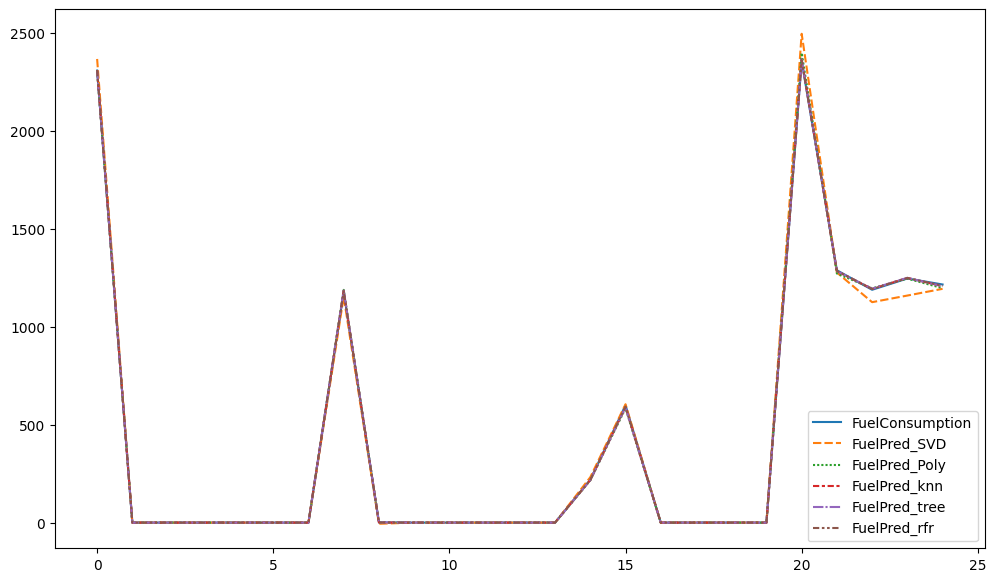

In [72]:
plt.figure(figsize=(12, 7))
sns.lineplot(data=df_days)

### Total fuel consumptions  & predictors with different algorithms calculate by weeks

In [73]:
df_weeks = df_new.groupby(pd.Grouper(key = 'timestamp', freq = 'W')).sum().reset_index()
df_weeks

,timestamp,FuelConsumption,FuelPred_SVD,FuelPred_Poly,FuelPred_knn,FuelPred_tree,FuelPred_rfr
0,2022-08-07,2306.730167,2365.888329,2302.407491,2309.106284,2307.416461,2309.833718
1,2022-08-14,1178.051875,1146.957319,1188.584319,1184.025379,1185.254310,1182.365819
2,2022-08-21,3173.135083,3330.177621,3196.179440,3170.186374,3169.862727,3170.493772
3,2022-08-28,4936.613858,4752.617595,4907.788286,4930.255073,4932.173714,4933.174477


In [74]:
mae_SVD_weeks = mean_absolute_error(df_weeks.FuelConsumption, df_weeks.FuelPred_SVD)
mae_Poly_weeks = mean_absolute_error(df_weeks.FuelConsumption, df_weeks.FuelPred_Poly)
mae_knn_weeks = mean_absolute_error(df_weeks.FuelConsumption, df_weeks.FuelPred_knn)
mae_tree_weeks = mean_absolute_error(df_weeks.FuelConsumption, df_weeks.FuelPred_tree)
mae_rfr_weeks = mean_absolute_error(df_weeks.FuelConsumption, df_weeks.FuelPred_rfr)

print(f"Absolute Error (days) is {mae_SVD_weeks:.2f} for model SVD") 
print(f"{mae_Poly_weeks:.2f} for model Polynormial") 
print(f"{mae_knn_weeks:.2f} for model KNN")
print(f"{mae_tree_weeks:.2f} for decision trees") 
print(f"{mae_rfr_weeks:.2f} for random forest")

Absolute Error (days) is 107.82 for model SVD
16.68 for model Polynormial
4.41 for model KNN
3.90 for decision trees
3.37 for random forest


<AxesSubplot:>

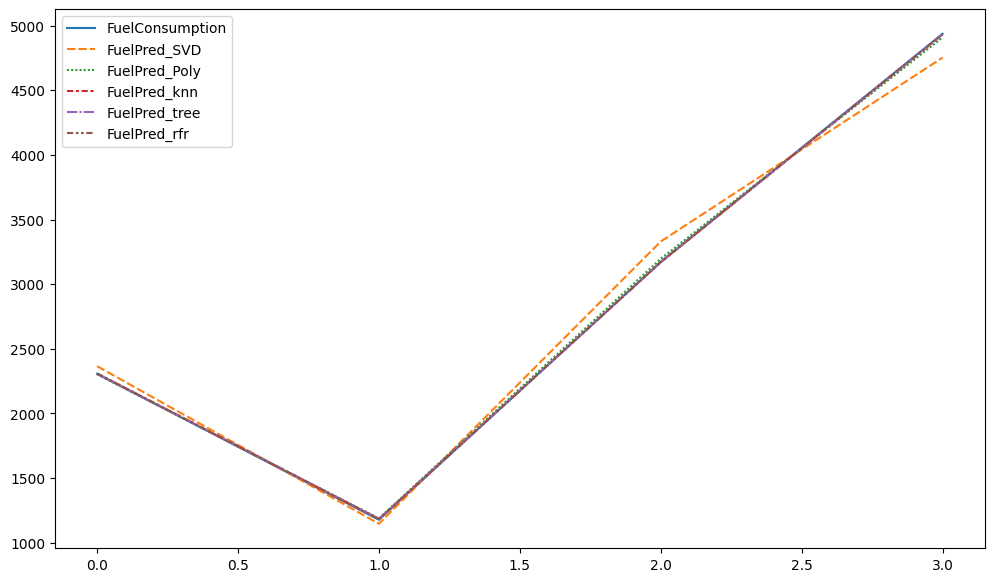

In [75]:
plt.figure(figsize=(12, 7))
sns.lineplot(data=df_weeks)

#### Accuracy for different models during time period

- Accuracy for days predictors

In [76]:
from sklearn import metrics

print(f"The accuracy for Linear Regression:      {metrics.r2_score(df_days.FuelConsumption, df_days.FuelPred_SVD):.7f}")
print(f"The accuracy for Polynormial Regression: {metrics.r2_score(df_days.FuelConsumption, df_days.FuelPred_Poly):.7f}")
print(f"The accuracy for KNN:                    {metrics.r2_score(df_days.FuelConsumption, df_days.FuelPred_knn):.7f}")
print(f"The accuracy for Decision Tree:          {metrics.r2_score(df_days.FuelConsumption, df_days.FuelPred_tree):.7f}")
print(f"The accuracy for Random forest:          {metrics.r2_score(df_days.FuelConsumption, df_days.FuelPred_rfr):.7f}")

The accuracy for Linear Regression:      0.9973159
The accuracy for Polynormial Regression: 0.9997919
The accuracy for KNN:                    0.9999765
The accuracy for Decision Tree:          0.9999719
The accuracy for Random forest:          0.9999871


- Accuracy for weeks predictors

In [77]:
print(f"The accuracy for Linear Regression:      {metrics.r2_score(df_weeks.FuelConsumption, df_weeks.FuelPred_SVD):.7f}")
print(f"The accuracy for Polynormial Regression: {metrics.r2_score(df_weeks.FuelConsumption, df_weeks.FuelPred_Poly):.7f}")
print(f"The accuracy for KNN:                    {metrics.r2_score(df_weeks.FuelConsumption, df_weeks.FuelPred_knn):.7f}")
print(f"The accuracy for Decision Tree:          {metrics.r2_score(df_weeks.FuelConsumption, df_weeks.FuelPred_tree):.7f}")
print(f"The accuracy for Random forest:          {metrics.r2_score(df_weeks.FuelConsumption, df_weeks.FuelPred_rfr):.7f}")

The accuracy for Linear Regression:      0.9916462
The accuracy for Polynormial Regression: 0.9998022
The accuracy for KNN:                    0.9999880
The accuracy for Decision Tree:          0.9999890
The accuracy for Random forest:          0.9999938


- references:
https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761